# Setup

In [1]:
from google.colab import files
import json
# files.upload()

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
%cd ~/.kaggle/
!touch kaggle.json
api_token = {"username":"avibewtra","key":"57c0b1a4dd936e5f3e20c684b854e472"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
%cd


rm: cannot remove '/root/.kaggle': No such file or directory
/root/.kaggle
/root


In [3]:
!cat ~/.kaggle/kaggle.json

{"username": "avibewtra", "key": "57c0b1a4dd936e5f3e20c684b854e472"}

In [4]:
# https://www.kaggle.com/datasets/erichqiu/nba-odds-and-scores
!mkdir nba-data
%cd nba-data
!kaggle datasets download -d erichqiu/nba-odds-and-scores

/root/nba-data
  0% 0.00/1.87M [00:00<?, ?B/s]
100% 1.87M/1.87M [00:00<00:00, 98.7MB/s]


In [5]:
!unzip -q nba-odds-and-scores.zip

# Pandas

In [6]:
import pandas as pd

In [7]:
%cd 2012-13
!ls

/root/nba-data/2012-13
raw_scores.txt	vegas_playoff.txt  vegas.txt


In [8]:
raw_scores = pd.read_csv("raw_scores.txt")
vegas = pd.read_csv("vegas.txt")
vegas_p = pd.read_csv("vegas_playoff.txt")

In [9]:
raw_scores.head()

,Unnamed: 0,GAME_SEQUENCE,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY_NAME,TEAM_WINS_LOSSES,PTS_QTR1,PTS_QTR2,PTS_QTR3,...,PTS_OT8,PTS_OT9,PTS_OT10,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,2012-10-30,1,21200001,1610612764,WAS,Washington,0-1,24,15,23,...,0.0,0.0,0.0,84,0.356,0.600,0.250,26,39,12
1,2012-10-30,1,21200001,1610612739,CLE,Cleveland,1-0,31,19,24,...,0.0,0.0,0.0,94,0.456,0.682,0.350,22,54,20
2,2012-10-30,2,21200002,1610612738,BOS,Boston,0-1,25,29,22,...,0.0,0.0,0.0,107,0.520,0.821,0.462,24,41,15
3,2012-10-30,2,21200002,1610612748,MIA,Miami,1-0,31,31,31,...,0.0,0.0,0.0,120,0.544,0.813,0.500,25,36,8
4,2012-10-30,3,21200003,1610612742,DAL,Dallas,1-0,25,23,26,...,0.0,0.0,0.0,99,0.471,0.778,0.333,22,40,11


In [10]:
vegas.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total
0,2012-10-30,away,Washington,Cleveland,1610612764,21200001,44.6,220.0,210.0,200,...,190.33,-108.17,191.0,187.0,-104,-110.0,84.0,-10.0,L,178.0
1,2012-10-30,home,Cleveland,Washington,1610612739,21200001,55.4,-260.0,-235.0,-240,...,190.33,-110.17,191.0,187.0,-106,-115.0,94.0,10.0,W,178.0
2,2012-10-30,away,Boston,Miami,1610612738,21200002,44.8,220.0,244.0,240,...,186.58,-107.33,188.0,182.0,-104,-110.0,107.0,-13.0,L,227.0
3,2012-10-30,home,Miami,Boston,1610612748,21200002,55.2,-260.0,-275.0,-260,...,186.58,-109.33,188.0,182.0,-105,-115.0,120.0,13.0,W,227.0
4,2012-10-30,away,Dallas,L.A. Lakers,1610612742,21200003,40.8,350.0,393.0,420,...,186.00,-107.50,187.0,185.0,-100,-110.0,99.0,8.0,W,190.0


In [11]:
vegas_p.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total
0,2013-04-20,away,Boston,New York,1610612738,41200111,42.8,250,300,305,...,189.50,-108.00,192.5,188.5,-105.0,-110,78,-7,L,163
1,2013-04-20,home,New York,Boston,1610612752,41200111,57.2,-300,-343,-335,...,189.50,-108.67,192.5,188.5,-102.0,-115,85,7,W,163
2,2013-04-20,away,Chicago,Brooklyn,1610612741,41200131,52.8,170,163,170,...,181.75,-108.33,184.0,181.0,-100.0,-115,89,-17,L,195
3,2013-04-20,home,Brooklyn,Chicago,1610612751,41200131,47.2,-195,-181,-185,...,181.75,-108.33,184.0,181.0,-105.0,-110,106,17,W,195
4,2013-04-20,away,Golden State,Denver,1610612744,41200161,47.3,330,314,325,...,211.33,-107.67,212.0,210.0,-101.0,-110,95,-2,L,192


In [12]:
teams_odds = pd.merge(raw_scores, vegas, left_on=["GAME_ID", "TEAM_ID"], right_on=["GameId", "TeamId"])

In [13]:
teams_odds.columns

Index(['Unnamed: 0', 'GAME_SEQUENCE', 'GAME_ID', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_CITY_NAME', 'TEAM_WINS_LOSSES', 'PTS_QTR1',
       'PTS_QTR2', 'PTS_QTR3', 'PTS_QTR4', 'PTS_OT1', 'PTS_OT2', 'PTS_OT3',
       'PTS_OT4', 'PTS_OT5', 'PTS_OT6', 'PTS_OT7', 'PTS_OT8', 'PTS_OT9',
       'PTS_OT10', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'TOV',
       'Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spre

In [14]:
teams_odds.head()

,Unnamed: 0,GAME_SEQUENCE,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY_NAME,TEAM_WINS_LOSSES,PTS_QTR1,PTS_QTR2,PTS_QTR3,...,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total
0,2012-10-30,1,21200001,1610612764,WAS,Washington,0-1,24,15,23,...,190.33,-108.17,191.0,187.0,-104,-110.0,84.0,-10.0,L,178.0
1,2012-10-30,1,21200001,1610612739,CLE,Cleveland,1-0,31,19,24,...,190.33,-110.17,191.0,187.0,-106,-115.0,94.0,10.0,W,178.0
2,2012-10-30,2,21200002,1610612738,BOS,Boston,0-1,25,29,22,...,186.58,-107.33,188.0,182.0,-104,-110.0,107.0,-13.0,L,227.0
3,2012-10-30,2,21200002,1610612748,MIA,Miami,1-0,31,31,31,...,186.58,-109.33,188.0,182.0,-105,-115.0,120.0,13.0,W,227.0
4,2012-10-30,3,21200003,1610612742,DAL,Dallas,1-0,25,23,26,...,186.00,-107.50,187.0,185.0,-100,-110.0,99.0,8.0,W,190.0


In [15]:
teams_odds_moneyline = teams_odds[['TeamId', 'GameId', 'PTS_QTR1', 'PTS_QTR2', 'PTS_QTR3', 'PTS_QTR4','PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'TOV', 'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML', 'Best_Line_ML', 'Worst_Line_ML']]

In [16]:
teams_odds_moneyline.mean()

TeamId             1.610613e+09
GameId             2.120062e+07
PTS_QTR1           2.455167e+01
PTS_QTR2           2.483360e+01
PTS_QTR3           2.409805e+01
PTS_QTR4           2.394264e+01
PTS                9.813792e+01
FG_PCT             4.540187e-01
FT_PCT             7.540631e-01
FG3_PCT            3.553076e-01
AST                2.213792e+01
REB                4.213792e+01
TOV                1.395199e+01
PercentBet_ML      4.804719e+01
Open_Line_ML      -3.684701e+01
Pinnacle_ML       -4.122798e+01
5dimes_ML         -3.022417e+01
Heritage_ML       -5.048617e+01
Bovada_ML         -3.235057e+01
Betonline_ML      -3.815299e+01
Average_Line_ML   -4.354260e+01
Best_Line_ML      -2.013670e+01
Worst_Line_ML     -6.971359e+01
dtype: float64

In [17]:
teams_odds_moneyline.std()

TeamId               8.656293
GameId             354.876091
PTS_QTR1             5.096143
PTS_QTR2             5.537196
PTS_QTR3             5.437377
PTS_QTR4             5.493064
PTS                 11.630666
FG_PCT               0.056224
FT_PCT               0.105184
FG3_PCT              0.113303
AST                  4.922527
REB                  6.445484
TOV                  3.680147
PercentBet_ML       29.845685
Open_Line_ML       404.367616
Pinnacle_ML        522.029743
5dimes_ML          472.195656
Heritage_ML        524.979821
Bovada_ML          287.115481
Betonline_ML       413.410760
Average_Line_ML    502.759609
Best_Line_ML       478.817234
Worst_Line_ML      525.543554
dtype: float64

In [18]:
teams_odds_moneyline

,TeamId,GameId,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS,FG_PCT,FT_PCT,FG3_PCT,...,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML
0,1610612764,21200001,24,15,23,22,84,0.356,0.600,0.250,...,44.6,220.0,210.0,200,210,215.0,210.0,209.0,215.0,200.0
1,1610612739,21200001,31,19,24,20,94,0.456,0.682,0.350,...,55.4,-260.0,-235.0,-240,-250,-255.0,-250.0,-246.0,-235.0,-255.0
2,1610612738,21200002,25,29,22,31,107,0.520,0.821,0.462,...,44.8,220.0,244.0,240,230,225.0,235.0,234.8,244.0,225.0
3,1610612748,21200002,31,31,31,27,120,0.544,0.813,0.500,...,55.2,-260.0,-275.0,-260,-270,-265.0,-280.0,-270.0,-260.0,-280.0
4,1610612742,21200003,25,23,26,25,99,0.471,0.778,0.333,...,40.8,350.0,393.0,420,400,375.0,385.0,394.6,420.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,1610612747,21201228,21,23,22,24,99,0.367,0.676,0.313,...,62.6,-140.0,-127.0,110,105,NaN,-150.0,-15.5,110.0,-150.0
2454,1610612746,21201229,27,27,24,34,112,0.500,0.667,0.500,...,33.3,-260.0,-250.0,-290,-305,-280.0,-300.0,-285.0,-250.0,-305.0
2455,1610612758,21201229,26,20,24,38,108,0.449,0.760,0.346,...,66.7,220.0,222.0,260,255,240.0,250.0,245.4,260.0,222.0
2456,1610612744,21201230,24,26,16,33,99,0.430,0.769,0.429,...,40.4,-380.0,-380.0,-400,-405,-420.0,-400.0,-401.0,-380.0,-420.0


In [19]:
teams_odds_moneyline.isnull().sum().sum()

816

In [20]:
teams_odds_moneyline1 = teams_odds_moneyline.dropna()

X = teams_odds_moneyline1[['TeamId', 'GameId', 'PTS_QTR1', 'PTS_QTR2', 'PTS_QTR3', 'PTS_QTR4','PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'TOV']]
y = teams_odds_moneyline1[['Open_Line_ML']]

teams_odds_moneyline1

,TeamId,GameId,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS,FG_PCT,FT_PCT,FG3_PCT,...,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML
0,1610612764,21200001,24,15,23,22,84,0.356,0.600,0.250,...,44.6,220.0,210.0,200,210,215.0,210.0,209.0,215.0,200.0
1,1610612739,21200001,31,19,24,20,94,0.456,0.682,0.350,...,55.4,-260.0,-235.0,-240,-250,-255.0,-250.0,-246.0,-235.0,-255.0
2,1610612738,21200002,25,29,22,31,107,0.520,0.821,0.462,...,44.8,220.0,244.0,240,230,225.0,235.0,234.8,244.0,225.0
3,1610612748,21200002,31,31,31,27,120,0.544,0.813,0.500,...,55.2,-260.0,-275.0,-260,-270,-265.0,-280.0,-270.0,-260.0,-280.0
4,1610612742,21200003,25,23,26,25,99,0.471,0.778,0.333,...,40.8,350.0,393.0,420,400,375.0,385.0,394.6,420.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1610612760,21201226,30,21,19,19,89,0.416,0.857,0.143,...,100.0,-190.0,-153.0,-150,-160,-155.0,-160.0,-155.6,-150.0,-160.0
2454,1610612746,21201229,27,27,24,34,112,0.500,0.667,0.500,...,33.3,-260.0,-250.0,-290,-305,-280.0,-300.0,-285.0,-250.0,-305.0
2455,1610612758,21201229,26,20,24,38,108,0.449,0.760,0.346,...,66.7,220.0,222.0,260,255,240.0,250.0,245.4,260.0,222.0
2456,1610612744,21201230,24,26,16,33,99,0.430,0.769,0.429,...,40.4,-380.0,-380.0,-400,-405,-420.0,-400.0,-401.0,-380.0,-420.0


# Models

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


## LinearSVR model

In [ ]:
from sklearn.svm import LinearSVR
SVC = LinearSVR()
SVC.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR()

In [ ]:
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics

y_pred = SVC.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 77894.61206896552


## SVR

In [ ]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = SVR.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 90817.07896551698


## XGBoost

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

[19:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = xgb.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 75119.54590197979


Auto ML, PyCaret

In [ ]:
#!pip install --pre pycaret
from pycaret.regression import *
reg = setup(teams_odds_moneyline1, target = 'Open_Line_ML', session_id=123, log_experiment=False, experiment_name='FullData')

ModuleNotFoundError: ignored

In [ ]:
best = compare_models()

NameError: ignored

# Data merging

In [ ]:
#svm, polonomial

In [ ]:
def last10games(data):
  df = pd.DataFrame()

  for 

In [ ]:
def merge_data(data, column):
  df = pd.DataFrame()

  for gameid in list(data[column].unique()):
    data1 = data.loc[data[column] == gameid][:1]
    data2 = data.loc[data[column] == gameid][1:2]

    merged_df = pd.merge(data1,data2, on=column)
    df = pd.concat([df, merged_df], ignore_index=True)

  # Now fix the odds column

  df['ABS_Line_ML'] = abs(df['Average_Line_ML_x']) + abs(df['Average_Line_ML_y'])
    
  return df


merged_data = merge_data(teams_odds_moneyline, 'GameId')


In [ ]:
merged_difference_data = merged_data
merged_difference_data['Average_Line_ML'] = merged_data['Average_Line_ML_x'] - merged_data['Average_Line_ML_y']
merged_difference_data = merged_difference_data.drop(["Average_Line_ML_x", "Average_Line_ML_y"], axis=1)
# X = merged_difference_data[['TeamId_x', 'GameId', 'PTS_QTR1_x', 'PTS_QTR2_x', 'PTS_QTR3_x',
#        'PTS_QTR4_x', 'PTS_x', 'FG_PCT_x', 'FT_PCT_x', 'FG3_PCT_x', 'AST_x',
#        'REB_x', 'TOV_x', 'TeamId_y',
#        'PTS_QTR1_y', 'PTS_QTR2_y', 'PTS_QTR3_y', 'PTS_QTR4_y', 'PTS_y',
#        'FG_PCT_y', 'FT_PCT_y', 'FG3_PCT_y', 'AST_y', 'REB_y', 'TOV_y']]
# y = merged_difference_data[['Average_Line_ML']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
merged_difference_data

,TeamId_x,GameId,PTS_QTR1_x,PTS_QTR2_x,PTS_QTR3_x,PTS_QTR4_x,PTS_x,FG_PCT_x,FT_PCT_x,FG3_PCT_x,...,PercentBet_ML_y,Open_Line_ML_y,Pinnacle_ML_y,5dimes_ML_y,Heritage_ML_y,Bovada_ML_y,Betonline_ML_y,Best_Line_ML_y,Worst_Line_ML_y,Average_Line_ML
0,1610612764,21200001,24,15,23,22,84,0.356,0.600,0.250,...,55.4,-260.0,-235.0,-240,-250,-255.0,-250.0,-235.0,-255.0,455.00
1,1610612738,21200002,25,29,22,31,107,0.520,0.821,0.462,...,55.2,-260.0,-275.0,-260,-270,-265.0,-280.0,-260.0,-280.0,504.80
2,1610612742,21200003,25,23,26,25,99,0.471,0.778,0.333,...,59.2,-425.0,-460.0,-475,-505,-550.0,-470.0,-460.0,-550.0,886.60
3,1610612754,21200004,27,21,15,27,90,0.474,0.688,0.455,...,58.1,125.0,102.0,-102,100,NaN,100.0,102.0,-102.0,-167.75
4,1610612743,21200005,22,16,14,23,75,0.375,0.455,0.222,...,46.6,-125.0,109.0,110,110,NaN,110.0,110.0,109.0,-237.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1610612749,21201226,21,24,23,27,95,0.424,0.722,0.370,...,100.0,-190.0,-153.0,-150,-160,-155.0,-160.0,-150.0,-160.0,294.20
1225,1610612756,21201227,20,20,29,29,98,0.385,0.647,0.280,...,48.4,-865.0,-1250.0,-1150,-1305,NaN,-1125.0,-1125.0,-1305.0,2106.25
1226,1610612745,21201228,24,26,21,19,95,0.417,0.708,0.242,...,62.6,-140.0,-127.0,110,105,NaN,-150.0,110.0,-150.0,15.50
1227,1610612746,21201229,27,27,24,34,112,0.500,0.667,0.500,...,66.7,220.0,222.0,260,255,240.0,250.0,260.0,222.0,-530.40


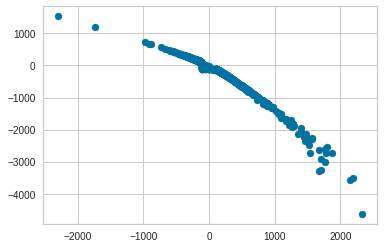

In [ ]:
plt.scatter(merged_data['Average_Line_ML_x'], merged_data['Average_Line_ML_y'])

In [ ]:
merged_difference_data[['Average_Line_ML_x', 'Average_Line_ML_y']].describe()

,Average_Line_ML_x,Average_Line_ML_y
count,1229.000000,1229.000000
mean,164.922587,-252.007795
std,386.631432,518.912490
min,-2301.670000,-4630.000000
25%,-128.250000,-352.600000
50%,157.800000,-175.600000
75%,297.000000,112.000000
max,2330.000000,1535.000000


In [ ]:
merged_difference_data['Average_Line_ML'].describe()

count    1229.000000
mean      416.930382
std       899.125476
min     -3836.670000
25%      -241.000000
50%       333.600000
75%       650.000000
max      6960.000000
Name: Average_Line_ML, dtype: float64

In [ ]:
Xy = merged_difference_data.dropna()[['PTS_QTR1_x', 'PTS_QTR2_x', 'PTS_QTR3_x', 'PTS_QTR4_x', 'PTS_x', \
       'FG_PCT_x', 'FT_PCT_x', 'FG3_PCT_x', 'AST_x', 'REB_x', 'TOV_x', \
       'PTS_QTR1_y', 'PTS_QTR2_y', 'PTS_QTR3_y', \
       'PTS_QTR4_y', 'PTS_y', 'FG_PCT_y', 'FT_PCT_y', 'FG3_PCT_y', 'AST_y', \
       'REB_y', 'TOV_y', 'Average_Line_ML']]
X = Xy.drop("Average_Line_ML", axis=1)
y = Xy[["Average_Line_ML"]]

In [ ]:
Xy.columns
Xy

,PTS_QTR1_x,PTS_QTR2_x,PTS_QTR3_x,PTS_QTR4_x,PTS_x,FG_PCT_x,FT_PCT_x,FG3_PCT_x,AST_x,REB_x,...,PTS_QTR3_y,PTS_QTR4_y,PTS_y,FG_PCT_y,FT_PCT_y,FG3_PCT_y,AST_y,REB_y,TOV_y,Average_Line_ML
0,24,15,23,22,84,0.356,0.600,0.250,26,39,...,24,20,94,0.456,0.682,0.350,22,54,20,455.0
1,25,29,22,31,107,0.520,0.821,0.462,24,41,...,31,27,120,0.544,0.813,0.500,25,36,8,504.8
2,25,23,26,25,99,0.471,0.778,0.333,22,40,...,20,25,91,0.494,0.387,0.231,24,46,14,886.6
6,23,17,23,24,87,0.405,0.813,0.353,14,40,...,25,24,93,0.418,0.758,0.222,21,46,18,503.2
7,28,15,28,28,99,0.475,0.654,0.300,22,43,...,21,24,95,0.438,0.913,0.235,26,43,13,-560.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,18,21,25,23,87,0.369,0.750,0.364,11,58,...,28,24,99,0.512,0.818,0.375,24,37,11,707.8
1223,30,26,24,28,108,0.462,0.750,0.414,26,45,...,15,19,95,0.418,1.000,0.389,20,40,17,914.6
1224,21,24,23,27,95,0.424,0.722,0.370,18,53,...,19,19,89,0.416,0.857,0.143,16,44,8,294.2
1227,27,27,24,34,112,0.500,0.667,0.500,25,44,...,24,38,108,0.449,0.760,0.346,23,44,11,-530.4


In [ ]:
!pip install --pre pycaret
!pip install --upgrade scikit-learn

In [ ]:
# !pip install --pre pycaret

from pycaret.regression import *
reg = setup(Xy, target = 'Average_Line_ML', session_id=12, log_experiment=False, experiment_name='FullData')

,Description,Value
0,Session id,12
1,Target,Average_Line_ML
2,Target type,Regression
3,Data shape,"(868, 23)"
4,Train data shape,"(607, 23)"
5,Test data shape,"(261, 23)"
6,Numeric features,22
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,369.7215,206385.9569,452.8421,0.1787,1.3689,0.7766,0.0230
lasso,Lasso Regression,369.9702,206488.6934,452.9524,0.1783,1.3850,0.7772,0.0260
llar,Lasso Least Angle Regression,376.7308,207951.9048,454.1117,0.1770,1.3261,0.7829,0.0290
lr,Linear Regression,368.8762,206548.1203,453.2424,0.1754,1.3800,0.7762,0.1780
br,Bayesian Ridge,375.9696,209275.0041,455.4235,0.1721,1.3638,0.7861,0.0360
en,Elastic Net,375.6398,211014.3129,457.3470,0.1648,1.3711,0.7888,0.0230
rf,Random Forest Regressor,375.7639,210044.5580,456.9652,0.1648,1.4186,0.7805,0.3930
huber,Huber Regressor,372.2436,213087.7768,459.6817,0.1555,1.3341,0.7979,0.0820
ada,AdaBoost Regressor,386.6131,213314.5521,460.7535,0.1486,1.5708,0.7945,0.0970
et,Extra Trees Regressor,382.5732,214544.0798,461.5703,0.1474,1.4041,0.7976,0.2420


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
sum((best.predict(Xy.drop('Average_Line_ML', axis=1)) - Xy["Average_Line_ML"]) ** 2) / len(Xy)

209363.7238729123

In [ ]:
SVC = LinearSVR()
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error {}".format(mse))


Mean Squared Error 319622.4379310345


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:

"""
['TeamId_x', 'GameId', 'PTS_QTR1_x', 'PTS_QTR2_x', 'PTS_QTR3_x',
       'PTS_QTR4_x', 'PTS_x', 'FG_PCT_x', 'FT_PCT_x', 'FG3_PCT_x', 'AST_x',
       'REB_x', 'TOV_x', 'PercentBet_ML_x', 'Open_Line_ML_x', 'Pinnacle_ML_x',
       '5dimes_ML_x', 'Heritage_ML_x', 'Bovada_ML_x', 'Betonline_ML_x',
       'Average_Line_ML_x', 'Best_Line_ML_x', 'Worst_Line_ML_x', 'TeamId_y',
       'PTS_QTR1_y', 'PTS_QTR2_y', 'PTS_QTR3_y', 'PTS_QTR4_y', 'PTS_y',
       'FG_PCT_y', 'FT_PCT_y', 'FG3_PCT_y', 'AST_y', 'REB_y', 'TOV_y',
       'PercentBet_ML_y', 'Open_Line_ML_y', 'Pinnacle_ML_y', '5dimes_ML_y',
       'Heritage_ML_y', 'Bovada_ML_y', 'Betonline_ML_y', 'Average_Line_ML_y',
       'Best_Line_ML_y', 'Worst_Line_ML_y']"""